In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import datetime

Датасет - `bus_table.csv`
- `data` - дата
- `route` - название маршрута автобуса
- `direction` - направление маршрута
- `scheduled` - время прибыттия по расписанию
- `actual` - фактическое время прибытия

## Задание 1
Прочитайте файл, сохранив результаты в `df`. Посмотрите статистики и инфо.

In [2]:
df = pd.read_csv('bus_table.csv')
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39157 non-null  object
 1   route      39157 non-null  object
 2   direction  39157 non-null  object
 3   scheduled  38917 non-null  object
 4   actual     39157 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


None

,data,route,direction,scheduled,actual
count,39157,39157,39157,38917,39157
unique,63,3,2,1356,27633
top,2016-04-14,A,north,23:00:25,08:08:24
freq,693,13358,19686,64,8


## Задание 2
Вырежте пропушеные данные (сохраните их в DataFrame `df_null`, они вам еще понадобятся) и удалите их из `df`. Выведите размерность `df_null`.

In [3]:
df_null = df[df.isna().any(axis = 1)]
df = df.dropna(axis=0, how='any')
print('Размерность df_null:', df_null.shape)

Размерность df_null: (240, 5)


## Задание 3
1. Добавьте столбец `table` дату/время прибытия автобусов по расписанию на остановку. 
2. Добавьте столбец `arrival` дату/временя актуального прибытия автобуса на остановку.


In [4]:
pd.options.mode.chained_assignment = None
df['table'] = pd.to_datetime(df['data'] + ' ' + df['scheduled'])

In [5]:
df['arrival'] = pd.to_datetime(df['data'] + ' ' + df['actual'])
df.head(3)

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46


In [6]:
#исправление абсурда...
minute = np.timedelta64(1, 'm')
hour = 60 * minute
_diff_ = (df['arrival'] - df['table']) / hour
df.loc[_diff_ > 22, 'arrival'] -= datetime.timedelta(days=1)
df.loc[_diff_ < -22, 'arrival'] += datetime.timedelta(days=1)


## Задание 4
1. Найдите три самых часто встречаюшихся в расписании автобусов временных интервалов (естественно для каждой возможной пары номер маршрута-направление).

2. Добавьте в таблицу столбик `inteval` - интервал по расписаню между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

3. Добавьте в таблицу столбик `arr_inteval` - интервал по фактическому между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

In [20]:
pd.DataFrame(df.groupby(['route','direction']).apply(lambda x:x['table'].sort_values().diff().value_counts().head(3), include_groups=False))

count
route direction table                 
A     north     0 days 00:12:00   1434
                0 days 00:15:00   1377
                0 days 00:07:00    756
      south     0 days 00:15:00   1453
                0 days 00:12:00   1312
                0 days 00:08:00    710
B     north     0 days 00:15:00   1507
                0 days 00:12:00   1413
                0 days 00:08:00   1141
      south     0 days 00:15:00   1391
                0 days 00:12:00   1300
                0 days 00:08:00   1159
C     north     0 days 00:10:00   1869
                0 days 00:15:00    590
                0 days 00:06:00    552
      south     0 days 00:10:00   1342
                0 days 00:12:00   1087
                0 days 00:15:00   1049

In [19]:
def upgrade (gh):
    minute = np.timedelta64(1, 'm')
    return gh.sort_values().diff() / minute

In [13]:
df['inteval'] = df.groupby(['route', 'direction'])['table'].transform(upgrade)
df = df.sort_values(by = ['route', 'direction','table'])
df.head()

,data,route,direction,scheduled,actual,table,arrival,time_late,inteval
19512,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,4.600000,NaN
19471,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,-0.100000,30.00
19487,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,4.833333,35.00
19511,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,8.750000,65.00
19504,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,-0.650000,195.05


In [14]:
df['arr_inteval'] = df.groupby(['route', 'direction'])['arrival'].transform(upgrade)
df.head()

,data,route,direction,scheduled,actual,table,arrival,time_late,inteval,arr_inteval
19512,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,4.600000,NaN,NaN
19471,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,-0.100000,30.00,25.300000
19487,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,4.833333,35.00,39.933333
19511,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,8.750000,65.00,68.916667
19504,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,-0.650000,195.05,185.650000


## Задание 5
Найдите время в минутах для опоздания авдобуса (+ задержка, - раньше расписания)

In [15]:
minute = np.timedelta64(1, 'm')
df['time_late'] = (df['arrival'] - df['table']) / minute
df.head()

,data,route,direction,scheduled,actual,table,arrival,time_late,inteval,arr_inteval
19512,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,4.600000,NaN,NaN
19471,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,-0.100000,30.00,25.300000
19487,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,4.833333,35.00,39.933333
19511,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,8.750000,65.00,68.916667
19504,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,-0.650000,195.05,185.650000


## Задание 6
1. Постройте максимально качественные гистограммы (или их аналоги) для разницы интервалов между автобусами для различных маршрутов и направлений.

2. Постройте максимально качественные гистограммы (или их аналоги) времени опоздания автобуса в зависимости от маршрута и направления.

   Увидели абсурд - возращаемся к началу и латаем код ;)

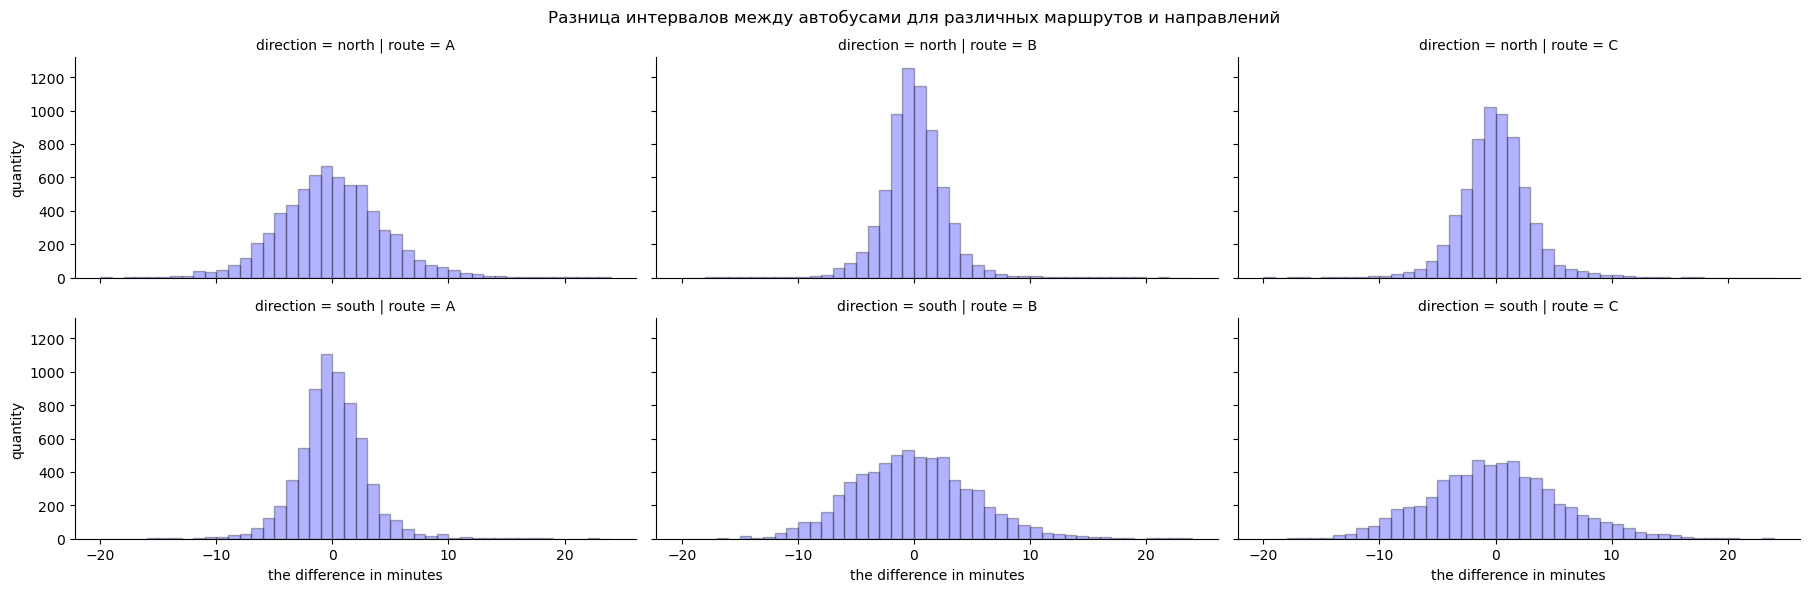

In [16]:
df['diff'] = df['arr_inteval'] - df['inteval']
g = sns.FacetGrid(df.dropna(), row="direction", col="route", height=3, aspect=2)
g.map(plt.hist, "diff", bins=np.arange(-20, 25), color = 'b', alpha = 0.3, edgecolor = 'black')
g.set_axis_labels('the difference in minutes', 'quantity')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Разница интервалов между автобусами для различных маршрутов и направлений');

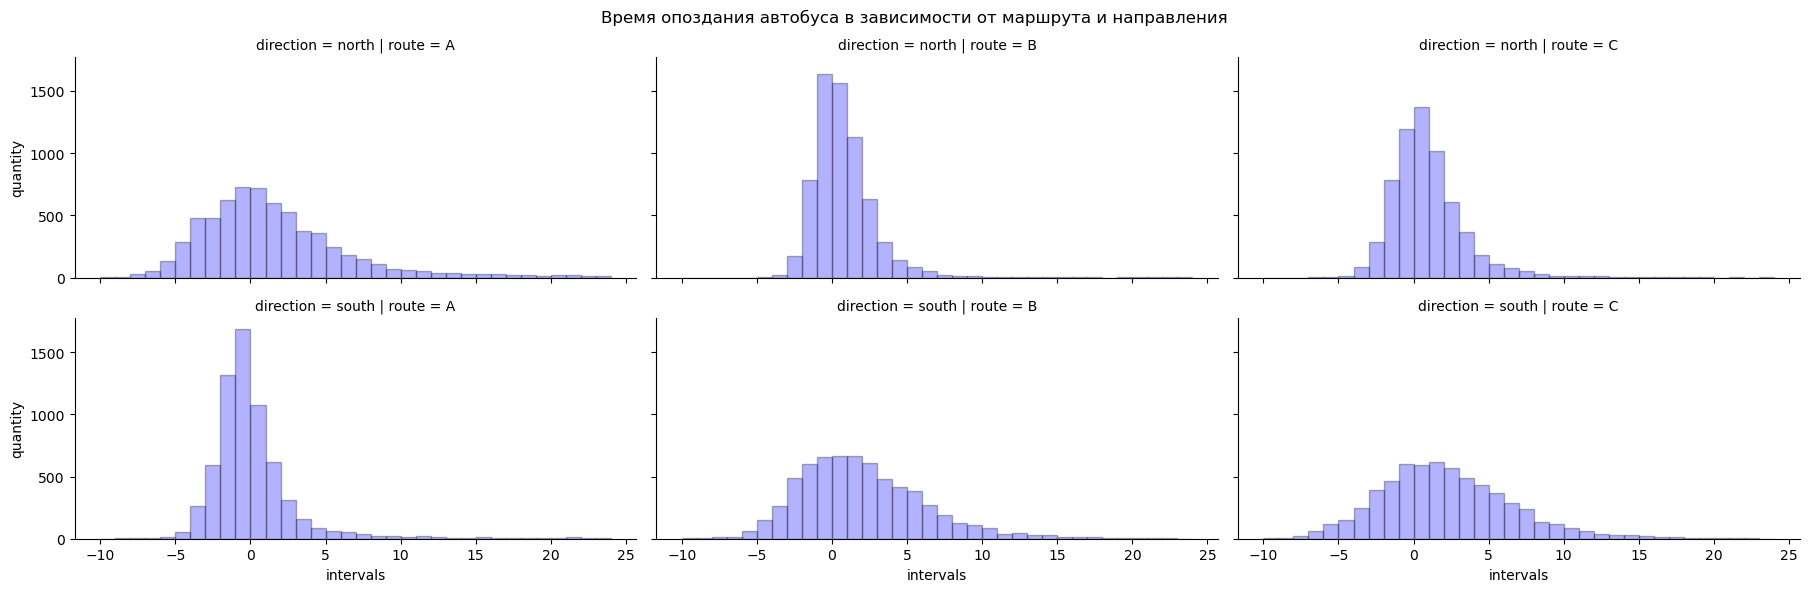

In [17]:
g = sns.FacetGrid(df, row="direction", col="route", height=3, aspect=2)
g.map(plt.hist, "time_late", bins=np.arange(-10, 25), color = 'b', alpha = 0.3, edgecolor = 'black')
g.set_axis_labels('intervals', 'quantity');
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Время опоздания автобуса в зависимости от маршрута и направления');

#### Можно, что либо сказать о маршрутах автобусов содержательно?

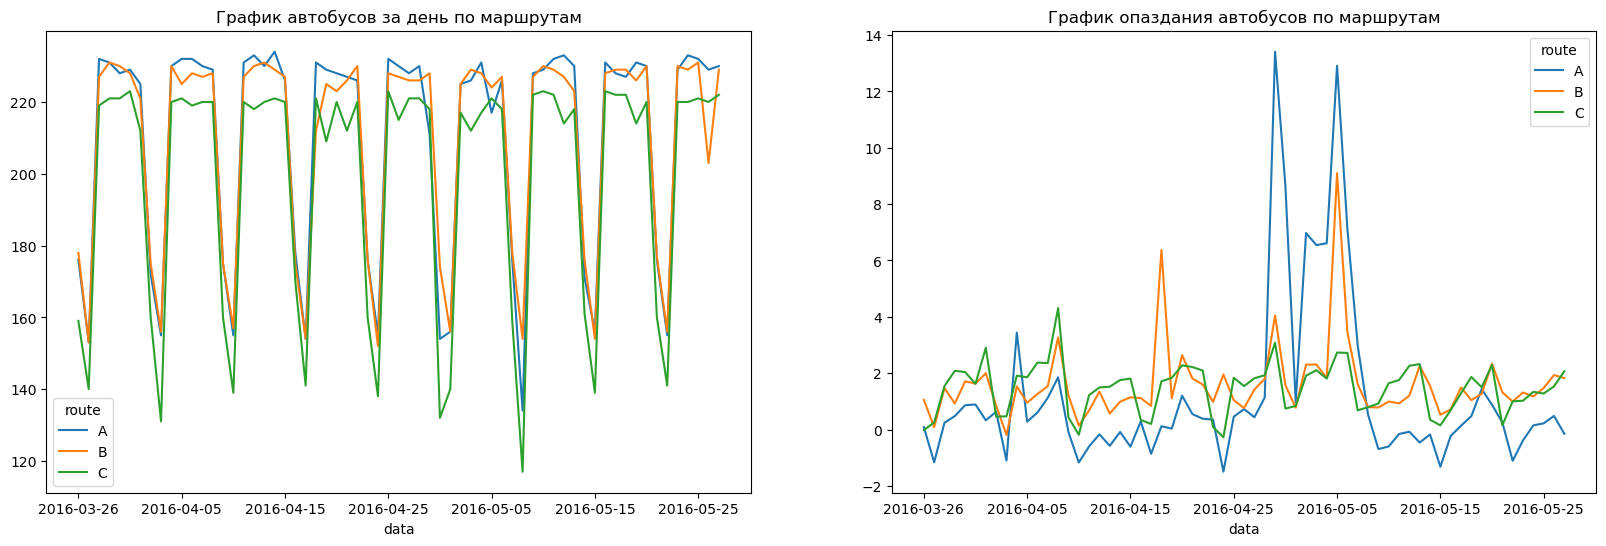

In [18]:
k = pd.crosstab(columns=df['route'], index=df['data'])
d = pd.pivot_table(df, values='time_late', index=df['data'], columns=df['route'])
fig , ax = plt.subplots(1,2,figsize=(20,6))
k.plot(ax=ax[0])
ax[0].set_title("График автобусов за день по маршрутам")
d.plot(ax=ax[1])
ax[1].set_title("График опаздания автобусов по маршрутам");

1. График автобусов за день по маршрутам показывает, что есть недельная тенденция. В течение пяти дней недели наблюдается большое количество автобусов по каждому из маршрутов, а другие два дня наблюдается спад.
2. График опаздания автобусов по маршрутам позволяет увидеть, что примерно между 2016-04-28 и 2016-05-08 опаздание на маршруте А было существенно большим.
3. Маршрут С достаточно спокойный, имеет недельную периодичность по опазданиям, так как в выходные опаздывает меньше, чем по будням.
4. Маршрут B тоже имеет всплески по опазданиям, в период  с 2016-04-18 по 2016-05-07 наблюдались опаздания выше, чем в другие дни.
5. По гистограммам можно сдлеать вывод, что интервалы опаздания у маршрутов A/south,  B/north и C/north в основном близки к нулю, отклонения от расписания небольшие. В случае же маршрутов A/north,  B/south и C/south разброс существенный.